In [26]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [145]:
import skimage

def max_pool(img: np.ndarray, size: int, method: callable = np.mean) -> np.ndarray:
    return skimage.measure.block_reduce(image, (size, size), method).astype(int)

image = cv2.imread("building.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # shape: (H, W)
print(image.shape)
image = max_pool(img=image, size=8, method=np.mean)

print(image.shape)

(4912, 7360)
(614, 920)


In [161]:
def pad_image(img: np.ndarray, kernel_size: tuple[int, int], method: str = "same", stride: int = 1) -> np.ndarray:
    padding_size_h = kernel_size[0] - 1
    padding_size_w = kernel_size[1] - 1

    return np.pad(img, ((padding_size_h, padding_size_h), (padding_size_w, padding_size_w)), mode="constant", constant_values=0)

def apply_kernel(img: np.ndarray, kernel: np.ndarray, stride: int = 1):
    img = pad_image(img=img, kernel_size=kernel.shape, stride=stride)
    image_width = img.shape[1]
    image_height = img.shape[0]
    kernel_width = kernel.shape[1]
    kernel_height = kernel.shape[0]
    
    output_image = np.zeros((image_height, image_width))
    
    for i in range(0, image_height, stride):
        if i + kernel_height >= image_height:
            continue
        for j in range(0, image_width, stride):
            if j + kernel_width >= image_width:
                continue
            region = img[i:i + kernel_height, j: j + kernel_width]
            value = np.sum(region * kernel)
            output_image[i // stride, j //stride] = value

    return output_image

def generate_random_kernel(size: tuple[int, int]) -> np.ndarray:
    return np.random.randn(5, 10)

vertical_kernel = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)


horizontal_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


edge_kernel_strong = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

emboss_kernel = np.array([
       [-4, -2,  0],
    [-2,  2,  2],
    [  0,  2,  4]])

img_vertical = apply_kernel(image, vertical_kernel)
img_horizontal = apply_kernel(image, horizontal_kernel)
img_edges = apply_kernel(image, edge_kernel_strong)
img_emboss =  apply_kernel(image, emboss_kernel)

In [160]:
np.random.randn(5, 10)

array([[-0.94545766,  0.50026998, -0.63464006,  0.62349513,  0.88171605,
        -0.11448737,  2.6942735 , -0.34912681, -0.24749238,  0.48367568],
       [ 0.8217991 , -0.65875815,  0.55921457,  0.19279783, -1.09908528,
         0.41396961, -1.18507215,  1.43092779,  0.87249548, -0.70580962],
       [-0.30526742, -0.49434094, -1.17299277,  0.62097232,  1.07000932,
        -0.90985937,  0.1826419 ,  0.02948072, -1.66139872, -0.19757201],
       [-0.07323111,  0.15381073, -0.59260019,  0.12958154,  0.55355697,
        -0.8230964 , -1.24244637, -0.06560958, -0.4068785 ,  1.33039706],
       [ 0.14681468, -0.68177369, -1.43616468, -0.2378938 ,  1.09234316,
        -0.14057033, -1.47523426,  2.01912988,  0.1216076 , -2.71118662]])

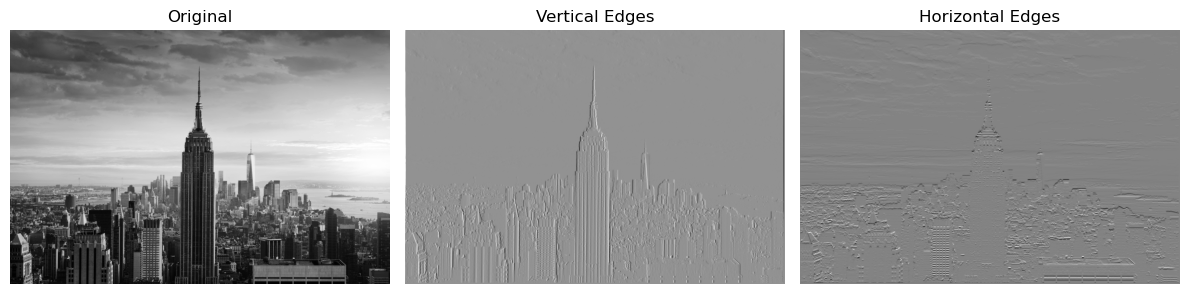

In [162]:
import matplotlib.pyplot as plt
import os

# Make sure output directory exists
os.makedirs("outputs", exist_ok=True)

# Create 1-row, 3-column subplot figure
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# List of images and titles
images = [
    (image, "Original"),
    (img_vertical, "Vertical Edges"),
    (img_horizontal, "Horizontal Edges")
]

# Plot each image in its subplot
for ax, (img, title) in zip(axs, images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

# Adjust layout and save figure
plt.tight_layout()
# plt.savefig("outputs/three_in_row.png")
plt.show()

In [ ]:
vertical_kernel = np.array([
    [-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]
], dtype=np.float32)


horizontal_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


edge_kernel_strong = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float32)

emboss_kernel = np.array([
       [-4, -2,  0],
    [-2,  2,  2],
    [  0,  2,  4]])

In [23]:
type(image)

numpy.ndarray